# *Data Science and Buisness Analytics Internship*

# *TSF GRIP DEC22*

# Task 2: Prediction using unsupervised ML

- In this task, we have to predict the optimum number of clusters and represent it visually.
- The data used for this task is a classic iris dataset. The Iris flower data set or Fisher's Iris data set is a multivariate data set. The data set consists of 150 samples from each of three species of Iris (Iris setosa Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

# KMeans Clustering:

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
# Loading the dataset 
data = pd.read_csv("Iris.csv")
print("Data imported successfully!!!!!")
data.head(5)

Data imported successfully!!!!!


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Forming the iris dataframe
f_data = pd.DataFrame(data=data,columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
print(f_data.head(10))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
5            5.4           3.9            1.7           0.4
6            4.6           3.4            1.4           0.3
7            5.0           3.4            1.5           0.2
8            4.4           2.9            1.4           0.2
9            4.9           3.1            1.5           0.1


### EDA -
           - Outliers or abnormal occurrences in a dataset can have an impact on the accuracy of machine learning models. 
           - The dataset might also contain some missing or duplicate values. EDA may be used to eliminate or resolve all of the dataset’s undesirable qualities.

In [5]:
f_data.shape

(150, 4)

In [6]:
f_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [8]:
f_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
f_data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

### Knowing missing values

In [11]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [12]:
f_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

 - The variables have no missing values.

####  *Analysing the distributions of sepal and petal dimensions*

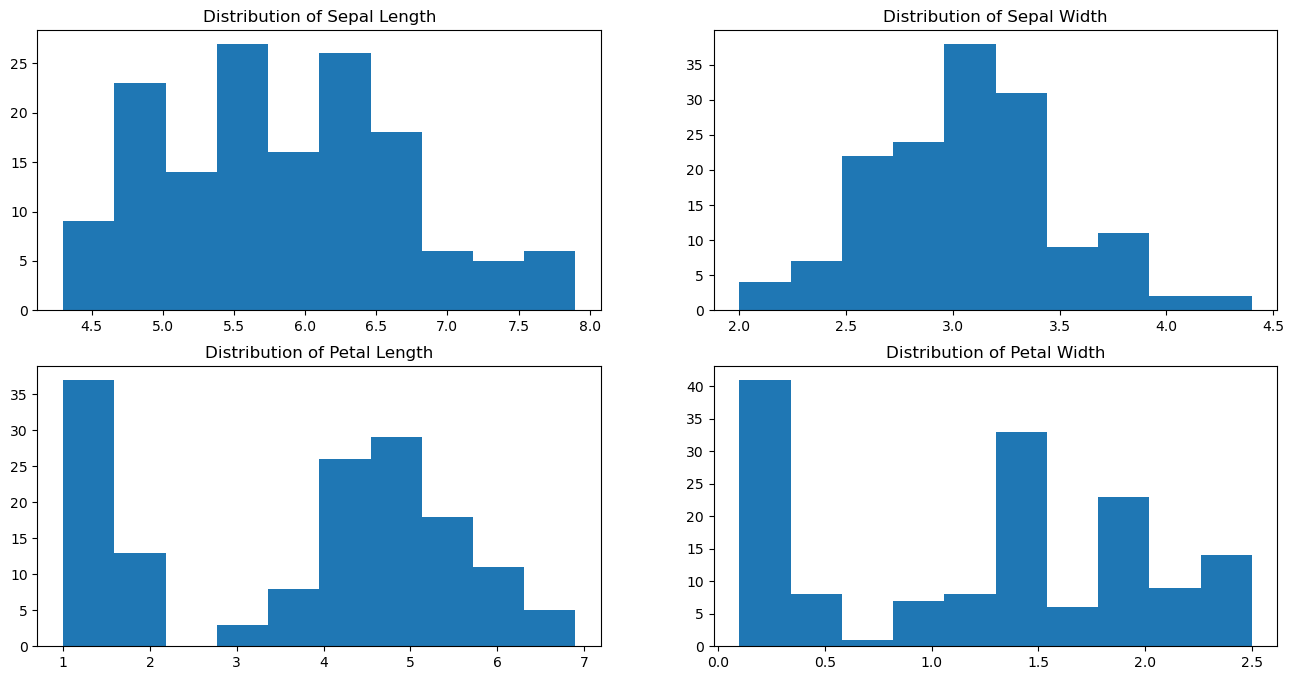

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

#plot for sepal length
axes[0,0].set_title('Distribution of Sepal Length')
axes[0,0].hist(data["SepalLengthCm"]);

#plot for sepal width
axes[0,1].set_title('Distribution of Sepal Width')
axes[0,1].hist(data["SepalWidthCm"]);

#plot for petal length
axes[1,0].set_title('Distribution of Petal Length')
axes[1,0].hist(data["PetalLengthCm"]); 

#plot for petal width
axes[1,1].set_title('Distribution of Petal Width')
axes[1,1].hist(data["PetalWidthCm"]);

##### From above histograms,we can observe that: 
                      - sepal width has almost normal curve.
                      - sepal length is lightly right skewed.
                      - We can't make any assumptions about the distributions of petal length and petal width just based on the histograms,as it does not have a definitive shape.

#### Analysing correlation between the features

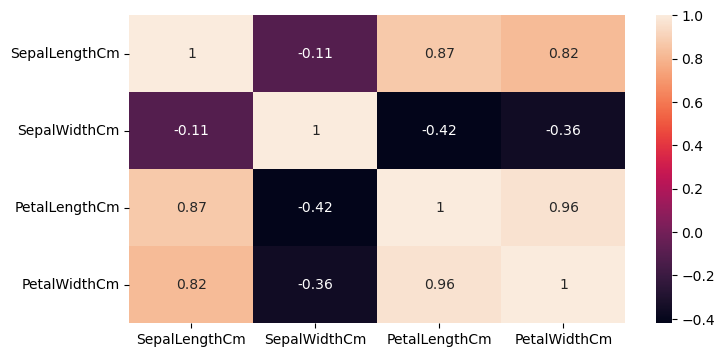

In [15]:
plt.figure(figsize=(8,4))
sns.heatmap(f_data.corr(), annot=True);

- From above heatmap, we can observe that:
                          - There is a high correlation between Petal length and petal width.
                          - Sepal length and sepal width are almost independent of each other.
                          - But, sepal length has a high correlation with both the petal length and petal width.

#### Optimum number of clusters for K Means:

C:\Users\DS_USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


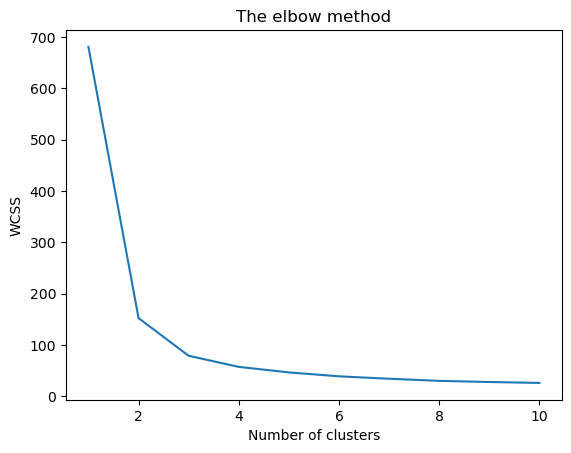

In [26]:
a = f_data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(a)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

 - From the above graph which is drawn by using elbow method, we choose the number of clusters as 3. 

In [27]:
# fitting the model to the train data

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(a)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- y_kmeans give us different clusters corresponding to X

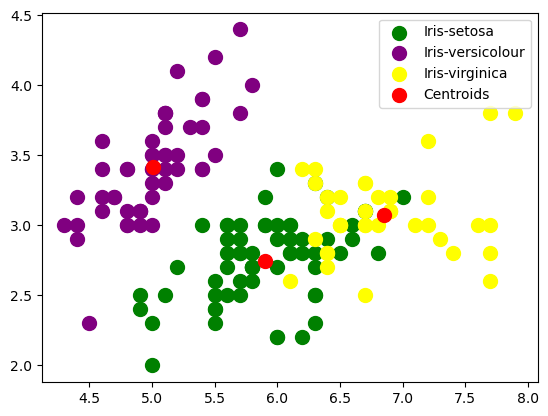

In [34]:
# Visualising the clusters - On the first two columns
plt.scatter(a[y_kmeans == 0, 0], a[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(a[y_kmeans == 1, 0], a[y_kmeans == 1, 1], 
            s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(a[y_kmeans == 2, 0], a[y_kmeans == 2, 1],
            s = 100, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()

# Cluster Evaluation:

- Let's evaluate the performance of our clusters. For that I used Silhouette score method.

- Silhouette score is used to evaluate the quality of clusters using clustering algorithms such as K-means in terms of how well samples are clusterd with other samples that are similar to each other.

In [35]:
from sklearn.metrics import silhouette_score
score=silhouette_score(a,y_kmeans,metric="euclidean")
print("For 3 clusters, Silhouette score is ",score)

For 3 clusters, Silhouette score is  0.5525919445499757


- As we know Silhouette score vary -1 to 1. When score is 1 that means, the clusters are very dense and nicely separated. So we can say that our clusters are also nicely separated.

-                Thank You!!!!